--- Đang tải dữ liệu từ thư mục: DATA/mask và tự động chia nhỏ ---
Found 7553 files belonging to 2 classes.
Using 6043 files for training.
Found 7553 files belonging to 2 classes.
Using 1510 files for validation.
Tên các lớp được phát hiện: ['with_mask', 'without_mask']
-> Đã lưu tên các lớp vào: savedModel/class_names.json


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,962 (28.20 MB)

 Trainable params: 7,392,770 (28.20 MB)

 Non-trainable params: 192 (768.00 B)


--- Bắt đầu huấn luyện mô hình (Tối đa 50 epochs) ---
Epoch 1/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 191s 959ms/step - accuracy: 0.8622 - loss: 0.4749 - val_accuracy: 0.9993 - val_loss: 0.0042
Epoch 2/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 190s 895ms/step - accuracy: 0.9244 - loss: 0.2185 - val_accuracy: 0.9874 - val_loss: 0.0500
Epoch 3/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 173s 915ms/step - accuracy: 0.9421 - loss: 0.1608 - val_accuracy: 0.9781 - val_loss: 0.0657
Epoch 4/50
189/189 ━━━━━━━━━━━━━━━━━━━━ 149s 637ms/step - accuracy: 0.9662 - loss: 0.0942 - val_accuracy: 0.9795 - val_loss: 0.0583
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.

--- Đánh giá cuối cùng trên tập kiểm tra (Test) ---
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 138ms/step - accuracy: 0.9993 - loss: 0.0042

Kết quả Đánh giá Cuối cùng:
Test Loss: 0.0042
Test Accuracy: 0.9993


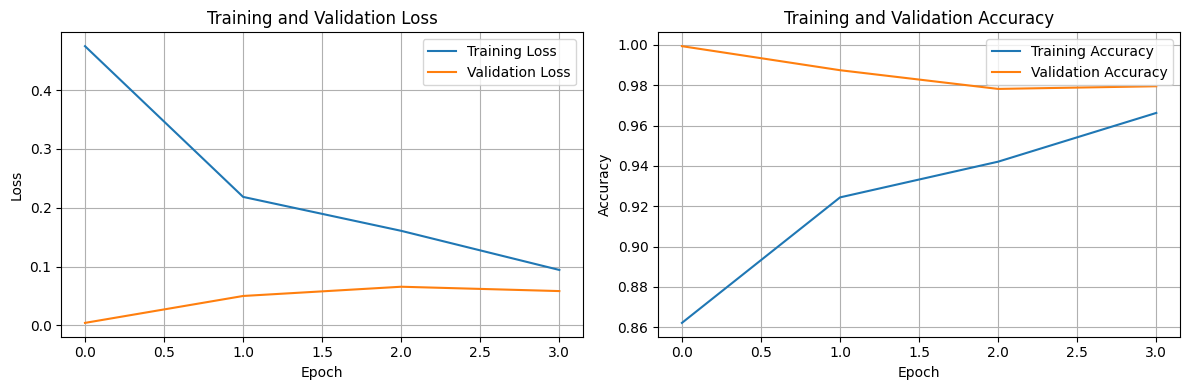


*** Đã lưu mô hình Keras hoàn chỉnh vào: savedModel/mask_detector_model.h5 ***


In [3]:
# Nguyễn Việt Quang B22DCCN650
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
import json # THÊM: Import thư viện JSON để lưu class names

# --- 1. Cấu hình Tham số và Đường dẫn ---
# Đặt kích thước ảnh và batch size
# Nguyễn Việt Quang B22DCCN650
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = 2
DATA_DIR = "DATA/mask"
# ĐƯỜNG DẪN LƯU MÔ HÌNH VÀ THÔNG TIN TRIỂN KHAI
MODEL_SAVE_PATH = "savedModel/mask_detector_model.h5"
CLASS_NAMES_PATH = "savedModel/class_names.json"

# --- 2. Định nghĩa Mô hình CNN
# Nguyễn Việt Quang B22DCCN650
def MaskCNN_Keras(input_shape=IMAGE_SIZE + (3,), num_classes=NUM_CLASSES):
    """
    Định nghĩa mô hình CNN phát hiện khẩu trang, chuyển đổi từ kiến trúc PyTorch.
    """
    model = Sequential([
        # Bước 1: Chuẩn hóa pixel về [0, 1]
        Rescaling(1./255, input_shape=input_shape),

        # Lớp Conv1
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Lớp Conv2
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Lớp Fully Connected
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),

        # Lớp đầu ra (softmax cho phân loại 2 lớp)
        Dense(num_classes, activation='softmax')
    ])
    return model

# --- 3. Tải Dữ liệu
def load_data(data_dir):
    """
    Sử dụng Keras utility để tải dữ liệu ảnh từ thư mục và tự động chia Train/Validation.
    Vì bạn chỉ có 1 thư mục gốc, ta sẽ chia tập dữ liệu thành train và validation.
    """
    print(f"--- Đang tải dữ liệu từ thư mục: {data_dir} và tự động chia nhỏ ---")

    # Tải tập huấn luyện (80% dữ liệu)
    # Nguyễn Việt Quang B22DCCN650
    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='categorical',
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=True,
        validation_split=0.2, # Chỉ định 20% cho validation/test
        subset='training',     # Chọn tập huấn luyện
        seed=42                # Đặt seed để đảm bảo tính lặp lại
    )

    # Tải tập kiểm định (20% còn lại của dữ liệu)
    # Nguyễn Việt Quang B22DCCN650
    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='categorical',
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        shuffle=False, # Không cần xáo trộn validation
        validation_split=0.2, # Chỉ định 20% cho validation/test
        subset='validation',   # Chọn tập kiểm định
        seed=42
    )

    # Do Keras gộp validation và test thành 1 subset,
    # chúng ta sẽ sử dụng tập val_ds làm cả tập kiểm định (validation) và kiểm tra (test)
    test_ds = val_ds

    # In ra tên lớp (class names) để đảm bảo Keras nhận đúng thư mục
    print("Tên các lớp được phát hiện:", train_ds.class_names)

    # LƯU TÊN CÁC LỚP CHO TRIỂN KHAI
    # Nguyễn Việt Quang B22DCCN650
    with open(CLASS_NAMES_PATH, 'w') as f:
        json.dump(train_ds.class_names, f)
    print(f"-> Đã lưu tên các lớp vào: {CLASS_NAMES_PATH}")


    return train_ds, val_ds, test_ds

def plot_training_history(history):
    # Nguyễn Việt Quang B22DCCN650
    """
    Vẽ đồ thị Loss và Accuracy của tập Train và Validation.
    """
    # 1. Vẽ đồ thị Loss
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # 2. Vẽ đồ thị Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


# --- 4. Hàm Chính để Huấn luyện và Đánh giá (Thay thế train_model.py và earlystop.py) ---
def train_and_evaluate_model():
    """
    Thiết lập, huấn luyện và đánh giá mô hình Keras.
    """
    if not os.path.isdir(DATA_DIR):
        print(f"LỖI: Không tìm thấy thư mục dữ liệu '{DATA_DIR}'.")
        print("Vui lòng đảm bảo bạn có cấu trúc thư mục: mask/with_mask và mask/without_mask.")
        return

    # Tải dữ liệu (và lưu class names)
    train_ds, val_ds, test_ds = load_data(DATA_DIR)

    # Khởi tạo mô hình
    model = MaskCNN_Keras()

    # In tóm tắt mô hình
    model.summary()

    # Nguyễn Việt Quang B22DCCN650
    early_stopping_callback = EarlyStopping(
        monitor='val_loss', # Theo dõi hàm mất mát trên tập kiểm định
        patience=3,         # Dừng sau 3 epochs nếu val_loss không cải thiện
        min_delta=0.01,    # Ngưỡng cải thiện tối thiểu
        verbose=1,
        restore_best_weights=True # Tải lại trọng số tốt nhất sau khi dừng
    )

    # Biên dịch mô hình
    # Nguyễn Việt Quang B22DCCN650
    model.compile(
        optimizer=Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',      # Hàm mất mát cho phân loại nhiều lớp (one-hot labels)
        metrics=['accuracy']
    )

    # Huấn luyện mô hình (Thay thế vòng lặp huấn luyện thủ công)
    # Nguyễn Việt Quang B22DCCN650
    EPOCHS = 50
    print(f"\n--- Bắt đầu huấn luyện mô hình (Tối đa {EPOCHS} epochs) ---")
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=[early_stopping_callback]
    )

    # Đánh giá cuối cùng trên tập kiểm tra
    # Nguyễn Việt Quang B22DCCN650
    print("\n--- Đánh giá cuối cùng trên tập kiểm tra (Test) ---")
    # Sử dụng test_ds (là một phần của val_ds) để đánh giá.
    test_loss, test_acc = model.evaluate(test_ds, verbose=1)

    print(f"\nKết quả Đánh giá Cuối cùng:")
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

    # VẼ ĐỒ THỊ
    plot_training_history(history)

    # THÊM: Lưu mô hình đã huấn luyện (chỉ lưu mô hình tốt nhất nhờ restore_best_weights=True)
    model.save(MODEL_SAVE_PATH)
    print(f"\n*** Đã lưu mô hình Keras hoàn chỉnh vào: {MODEL_SAVE_PATH} ***")


if __name__ == "__main__":
    # Tắt thông báo cấp thấp của TensorFlow để console sạch hơn
    tf.get_logger().setLevel('ERROR')

    # Chạy quy trình
    train_and_evaluate_model()